# Base Code From Kaggle

In [32]:
import numpy as np
import pandas as pd
import os
import wfdb
import matplotlib.pyplot as plt
import math
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [5]:
all_signal=[]
meta_data=[]
for file in sorted(os.listdir("./data/")):
    if file.endswith(".dat"):
      #（fs|units|sig_name|comments）
        signals, fields = wfdb.rdsamp("./data/" + os.path.splitext(file)[0])
       
        all_signal.append(signals)
      
        meta_data.append(fields)

In [6]:
i=1
for item in meta_data:
    print("driver",i)
    i=i+1
    print("total time(min):", round(item['sig_len']/15.5/60, 2))
    print("sigal number:",item['n_sig'])
    print("sigal name:",item['sig_name'])
    print("--------------------")

driver 1
total time(min): 66.13
sigal number: 6
sigal name: ['ECG', 'EMG', 'foot GSR', 'hand GSR', 'HR', 'RESP']
--------------------
driver 2
total time(min): 83.93
sigal number: 5
sigal name: ['ECG', 'foot GSR', 'HR', 'marker', 'RESP']
--------------------
driver 3
total time(min): 185.43
sigal number: 4
sigal name: ['ECG', 'foot GSR', 'hand GSR', 'RESP']
--------------------
driver 4
total time(min): 82.01
sigal number: 6
sigal name: ['ECG', 'foot GSR', 'hand GSR', 'HR', 'marker', 'RESP']
--------------------
driver 5
total time(min): 84.27
sigal number: 7
sigal name: ['ECG', 'EMG', 'foot GSR', 'hand GSR', 'HR', 'marker', 'RESP']
--------------------
driver 6
total time(min): 80.78
sigal number: 7
sigal name: ['ECG', 'EMG', 'foot GSR', 'hand GSR', 'HR', 'marker', 'RESP']
--------------------
driver 7
total time(min): 88.65
sigal number: 7
sigal name: ['ECG', 'EMG', 'foot GSR', 'hand GSr', 'HR', 'marker', 'RESP']
--------------------
driver 8
total time(min): 81.19
sigal number: 7
si

In [7]:
meta_data

[{'fs': 15.5,
  'sig_len': 61499,
  'n_sig': 6,
  'base_date': None,
  'base_time': None,
  'units': ['mV', 'mV', 'mV', 'mV', 'bpm', 'mV'],
  'sig_name': ['ECG', 'EMG', 'foot GSR', 'hand GSR', 'HR', 'RESP'],
  'comments': []},
 {'fs': 15.5,
  'sig_len': 78056,
  'n_sig': 5,
  'base_date': None,
  'base_time': None,
  'units': ['mV', 'mV', 'bpm', 'mV', 'mV'],
  'sig_name': ['ECG', 'foot GSR', 'HR', 'marker', 'RESP'],
  'comments': []},
 {'fs': 31,
  'sig_len': 172447,
  'n_sig': 4,
  'base_date': None,
  'base_time': None,
  'units': ['mV', 'mV', 'mV', 'mV'],
  'sig_name': ['ECG', 'foot GSR', 'hand GSR', 'RESP'],
  'comments': []},
 {'fs': 15.5,
  'sig_len': 76266,
  'n_sig': 6,
  'base_date': None,
  'base_time': None,
  'units': ['mV', 'mV', 'mV', 'bpm', 'mV', 'mV'],
  'sig_name': ['ECG', 'foot GSR', 'hand GSR', 'HR', 'marker', 'RESP'],
  'comments': []},
 {'fs': 15.5,
  'sig_len': 78367,
  'n_sig': 7,
  'base_date': None,
  'base_time': None,
  'units': ['mV', 'mV', 'mV', 'mV', 'bpm'

In [8]:
all_signal

[array([[-3.0000e-02, -7.2000e-03,  2.5040e+00,  1.1146e+01,  8.4000e+01,
          1.0948e+01],
        [-2.6000e-02, -3.3000e-03,  2.5120e+00,  1.1136e+01,  8.4000e+01,
          1.0958e+01],
        [-1.6000e-02,  1.9000e-03,  2.5140e+00,  1.1127e+01,  8.4000e+01,
          1.0982e+01],
        ...,
        [ 6.7000e-02, -4.9000e-03,  1.7850e+00,  2.3291e+01,  9.4000e+01,
          1.1642e+01],
        [ 5.4000e-02,  1.5000e-03,  1.7850e+00,  2.3502e+01,  9.4000e+01,
          1.1750e+01],
        [ 4.9000e-02, -6.4000e-03,  1.7860e+00,  2.3738e+01,  9.4000e+01,
          1.1828e+01]]),
 array([[-6.03000000e-01,  1.80200000e+00,  7.49925007e+01,
          0.00000000e+00,  1.15740000e+01],
        [-4.09000000e-01,  1.80200000e+00,  7.49925007e+01,
          0.00000000e+00,  1.14720000e+01],
        [-4.05000000e-01,  1.80200000e+00,  7.79922008e+01,
          0.00000000e+00,  1.13880000e+01],
        ...,
        [ 6.07000000e-01,  1.17900000e+00,  9.99900010e+01,
          1.875000

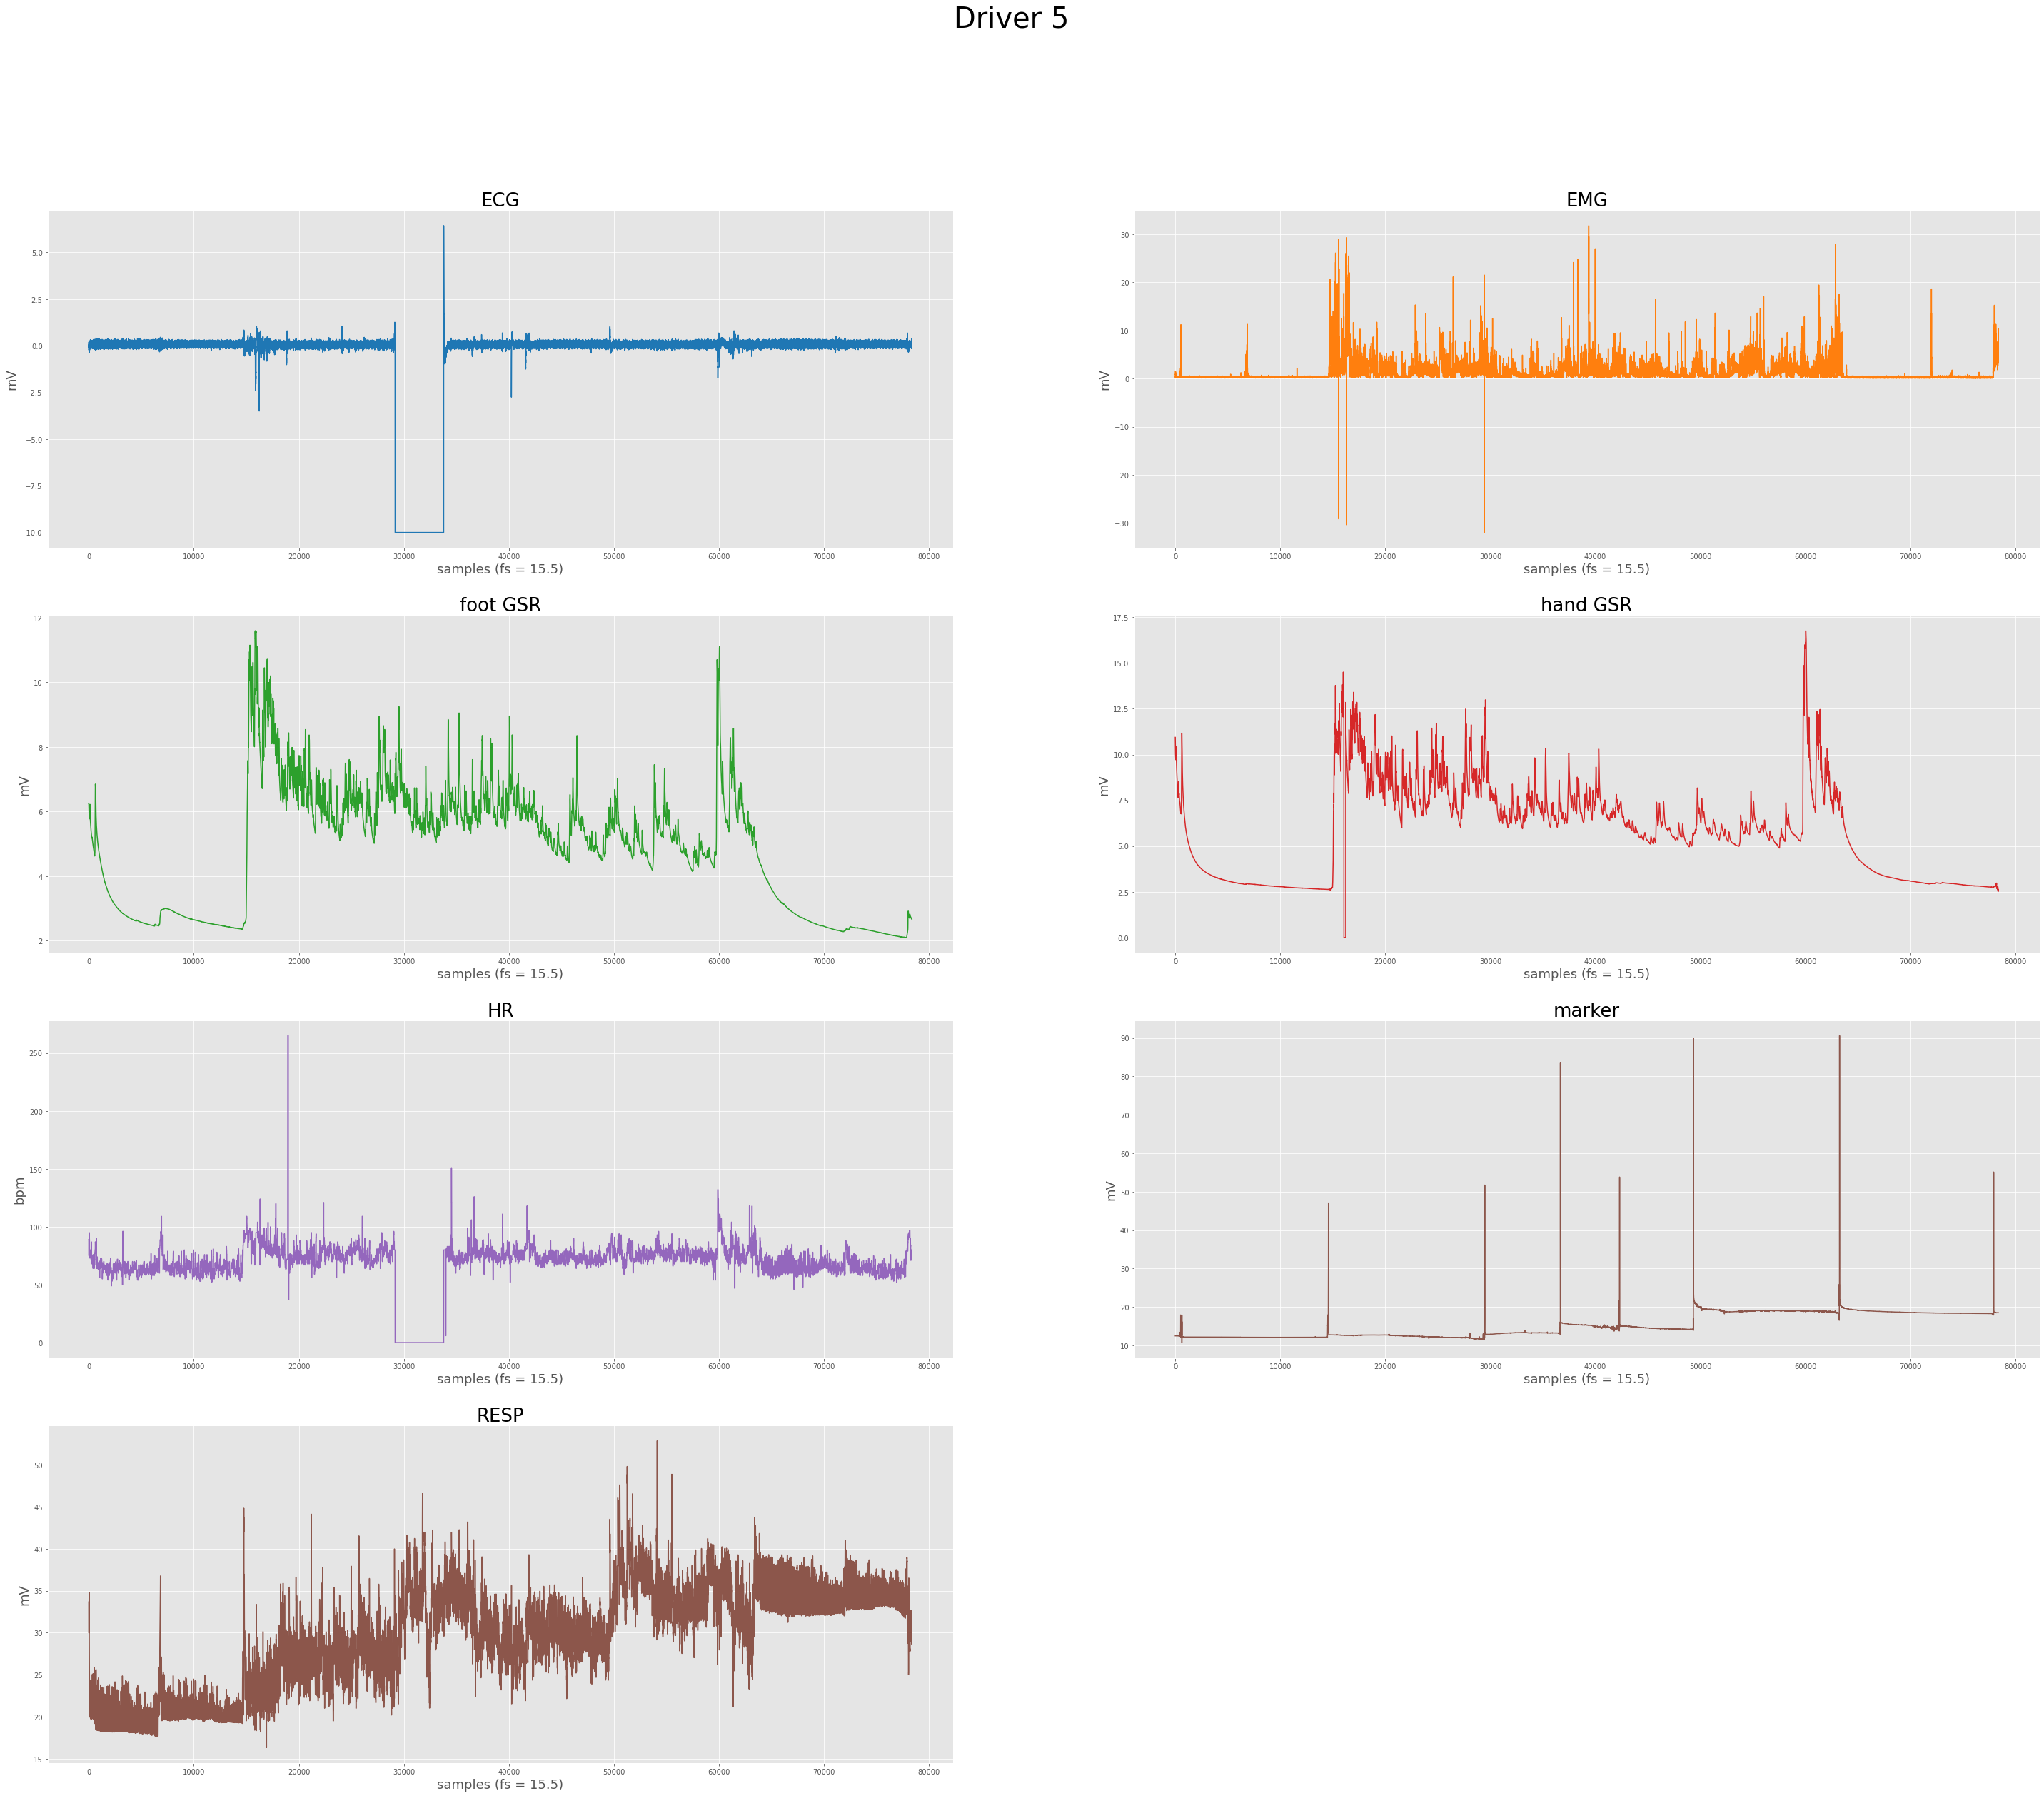

In [9]:
my_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#8c564b"]
plt.style.use('ggplot')
plt.figure(figsize=(50, 40))
plt.suptitle("Driver 5", fontsize=40)
for i in range(all_signal[4].shape[1]):
    plt.subplot(4, 2, i + 1)
    plt.ylabel(meta_data[4]['units'][i], fontsize=18)
    plt.xlabel("samples (fs = 15.5)", fontsize=18)
    plt.plot(all_signal[4].T[i], color=my_colors[i])
    plt.title(meta_data[4]['sig_name'][i],fontsize=26)

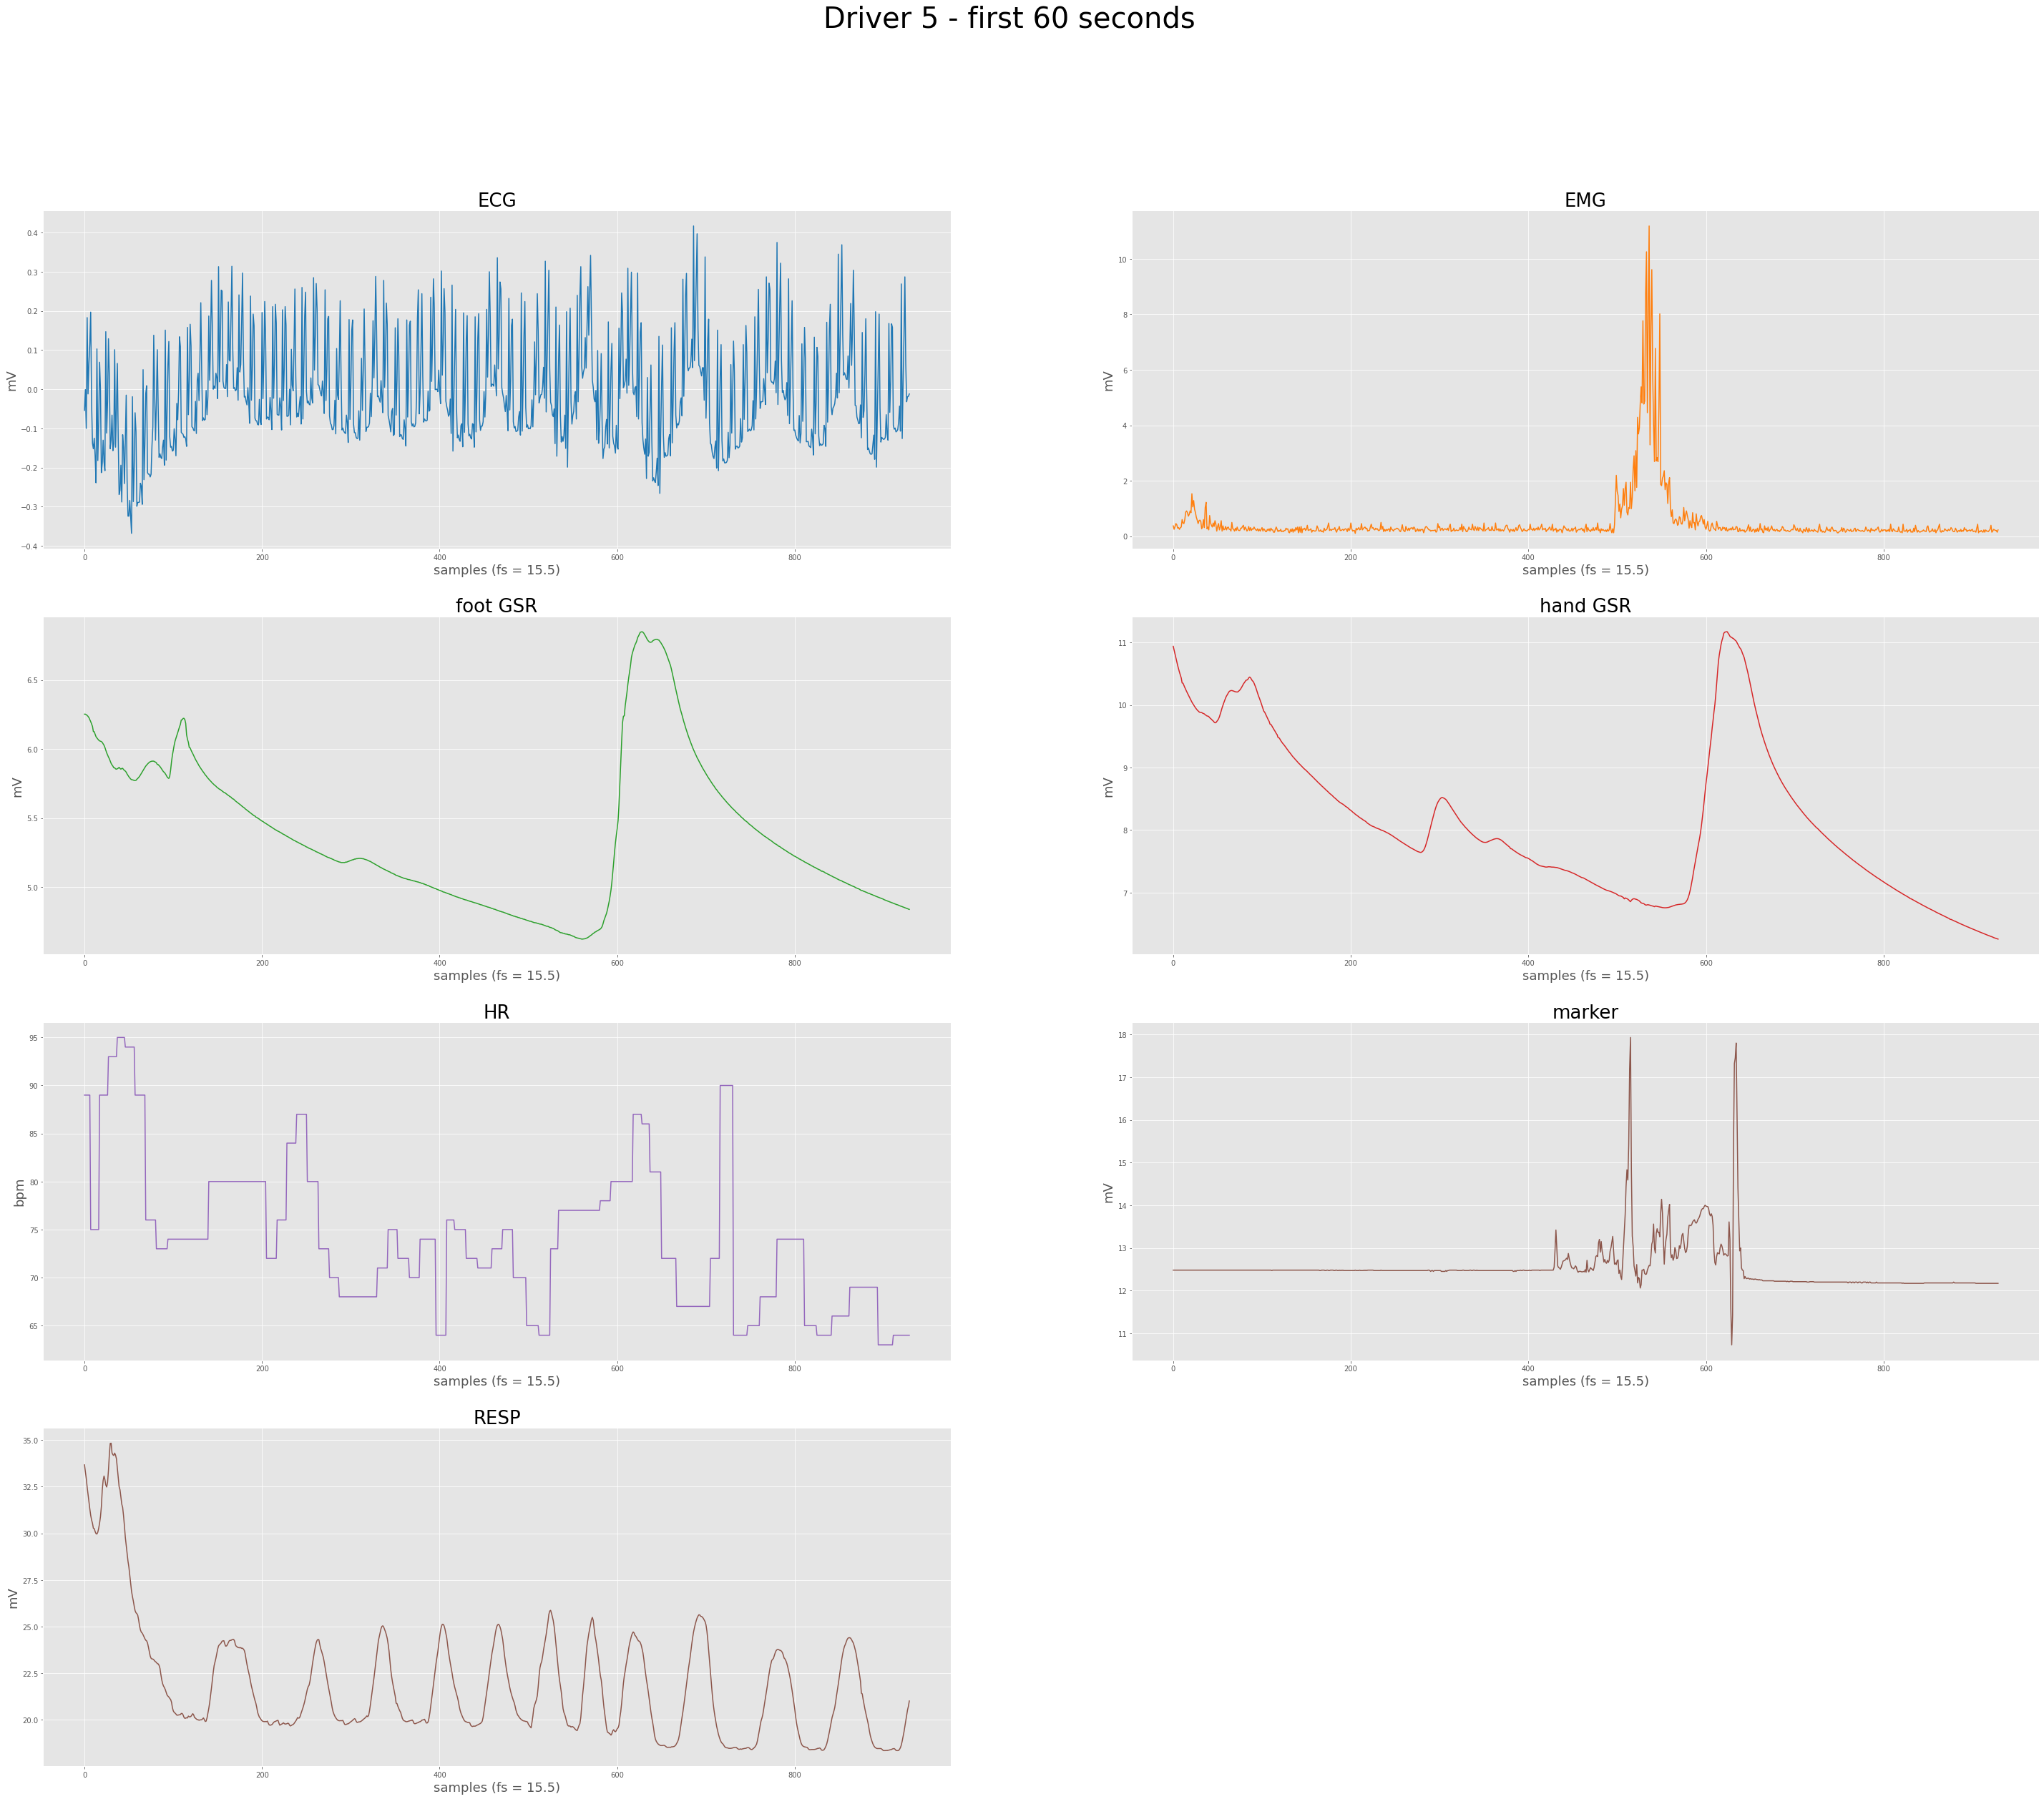

In [10]:
my_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#8c564b"]
plt.style.use('ggplot')
plt.figure(figsize=(50, 40))
plt.suptitle("Driver 5 - first 60 seconds", fontsize=40)
for i in range(all_signal[4].shape[1]):
    plt.subplot(4, 2, i + 1)
    plt.ylabel(meta_data[4]['units'][i], fontsize=18)
    plt.xlabel("samples (fs = 15.5)", fontsize=18)
    plt.plot(all_signal[4].T[i][0:int(15.5 * 60)], color=my_colors[i])
    plt.title(meta_data[4]['sig_name'][i],fontsize=26)

In [11]:
signal_1 = all_signal[4:12]
signal_2 = all_signal[14:16]
signal = signal_1 + signal_2

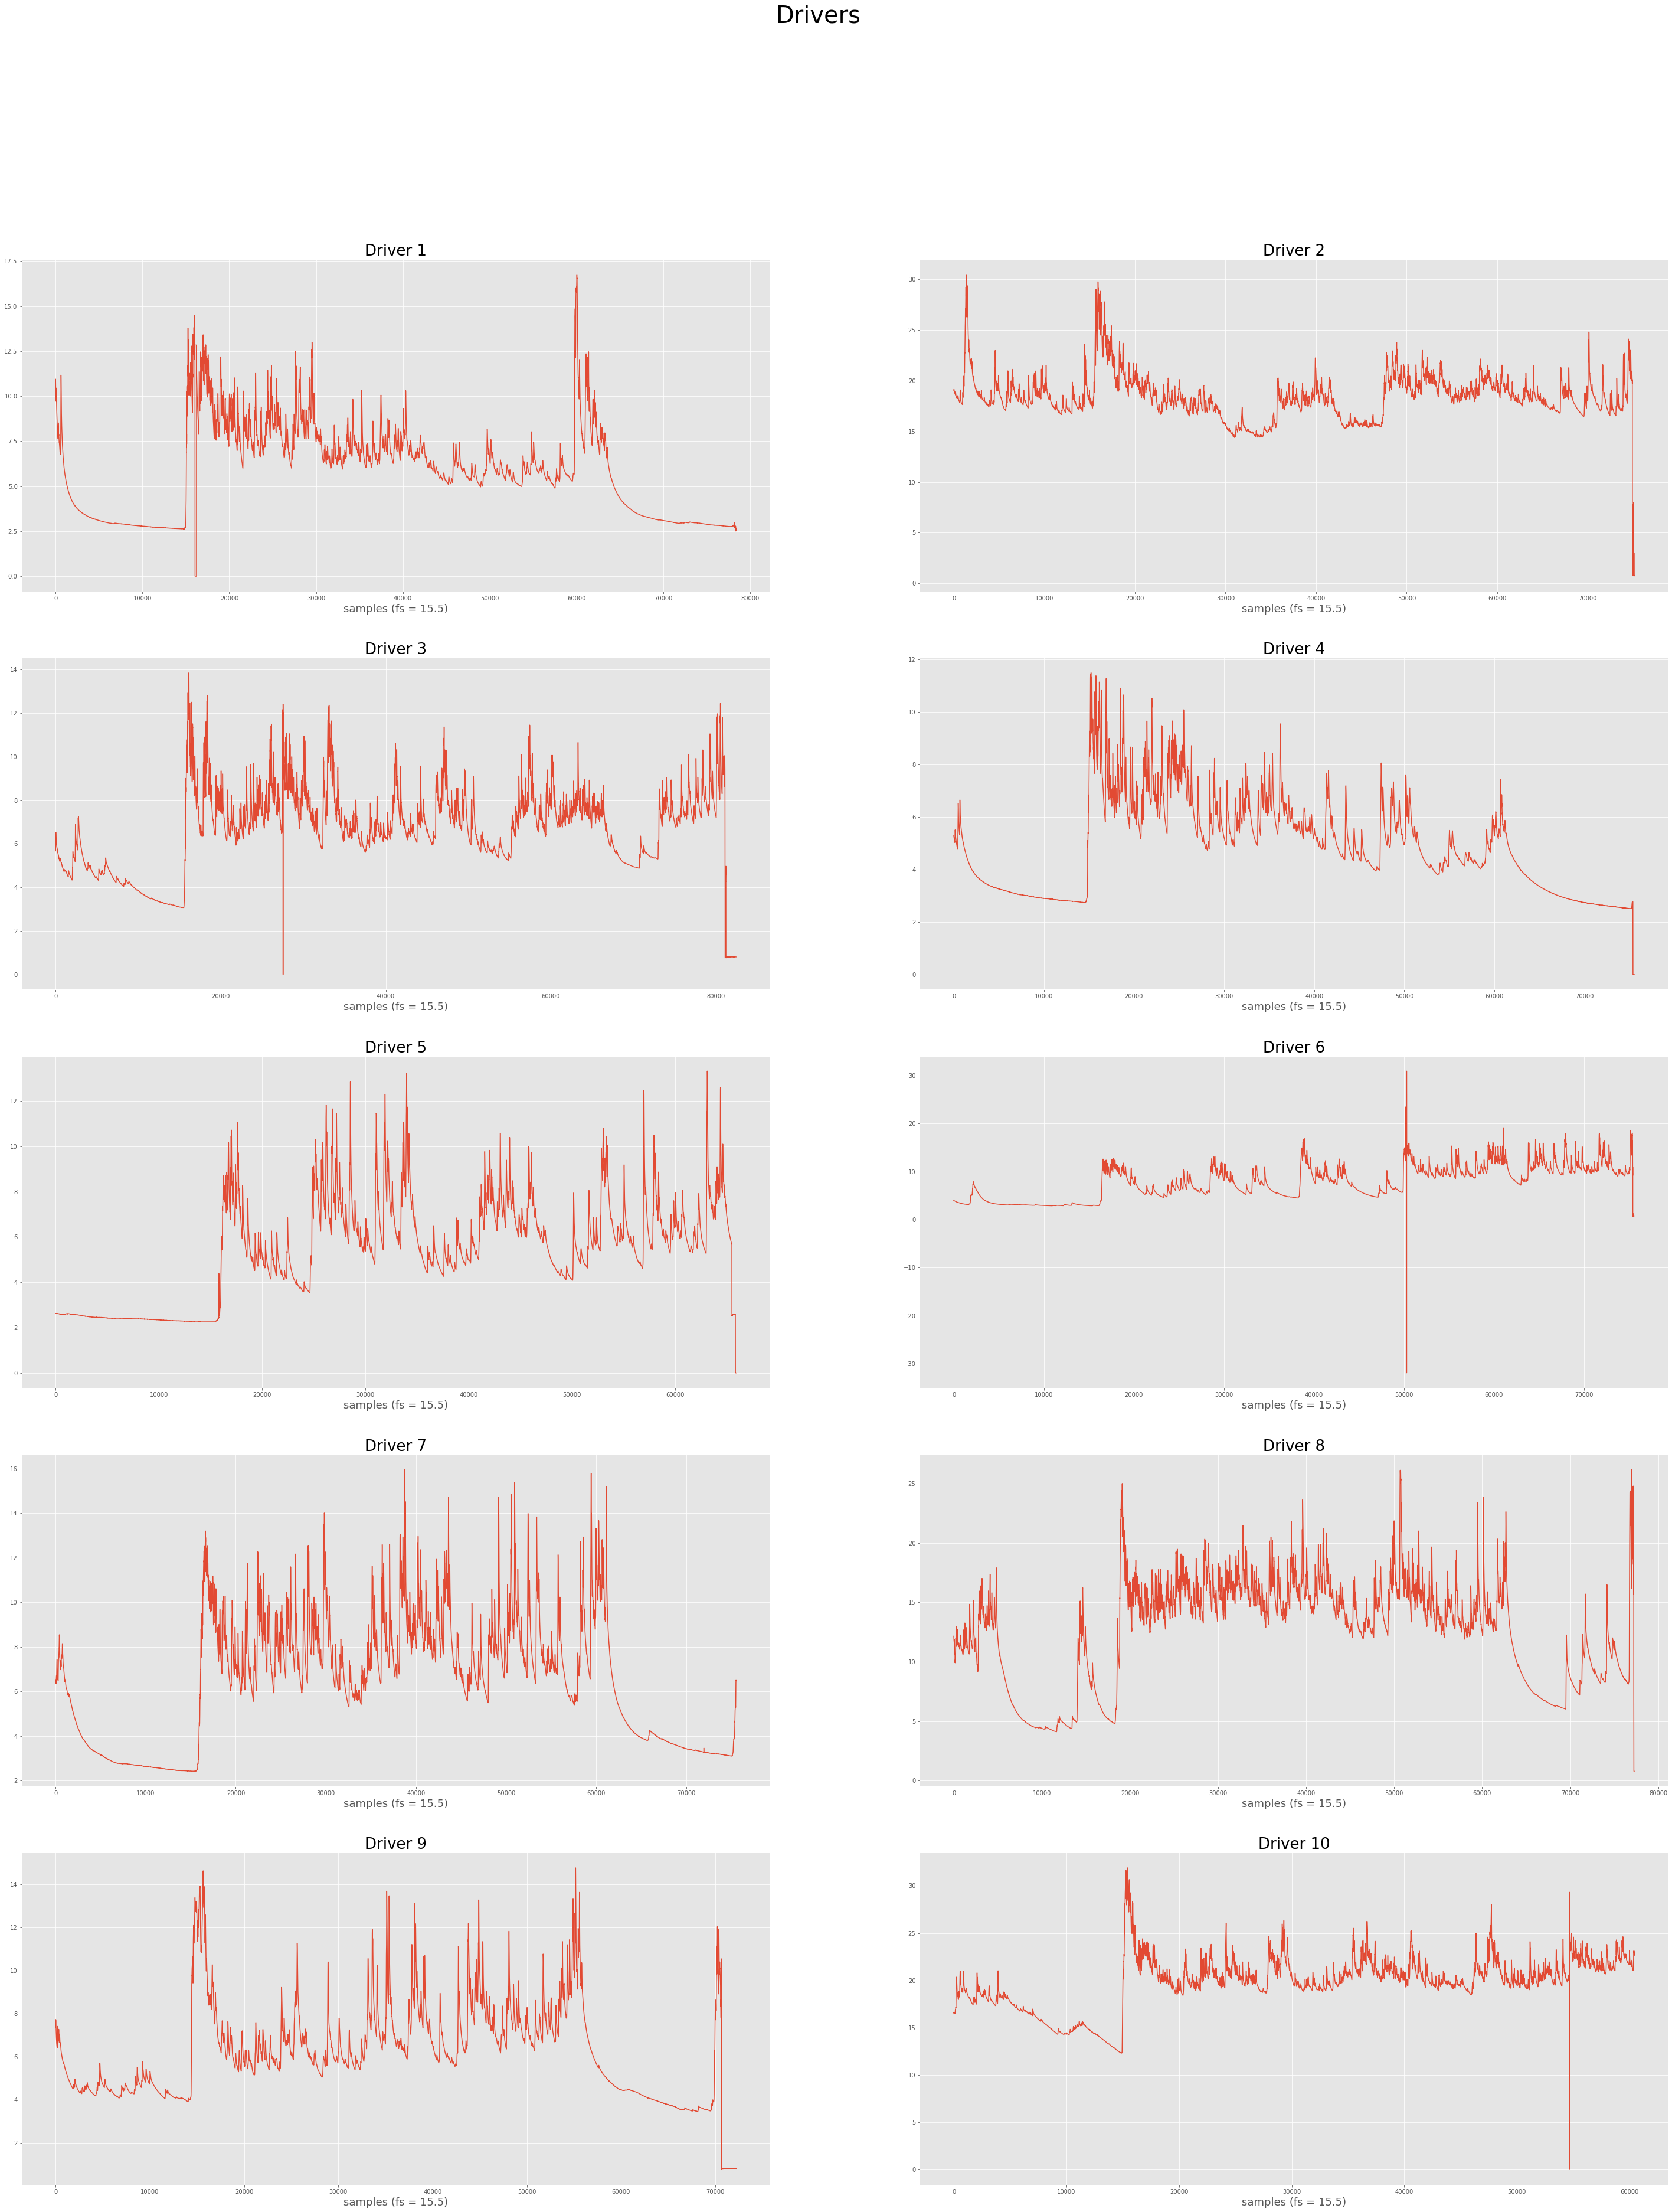

In [12]:
plt.style.use('ggplot')
plt.figure(figsize=(50, 60))
plt.suptitle("Drivers", fontsize=40)
for i in range(0, 10):
    plt.subplot(5, 2, i + 1)
    plt.xlabel("samples (fs = 15.5)", fontsize=18)
    plt.plot(signal[i].T[3])
    plt.title("Driver %d" % (i + 1),fontsize=26)

In [13]:
df_time_intervals = pd.read_csv('time_intervals.csv')

In [14]:
df_time_intervals

,Drive No,Initial Rest,City 1,Highway,City 2,Highway 2,City 3,Final Rest,Total rec. time(min)
0,Drive05,15.13,16.00,7.74,6.06,7.56,14.96,15.75,83.23
1,Drive06,15.05,14.49,7.32,6.53,7.64,12.29,15.05,78.38
2,Drive07,15.04,16.23,10.96,9.83,7.64,10.15,15.03,84.87
3,Drive08,15.00,12.31,7.23,9.51,7.64,13.43,15.07,80.19
4,Drive09,15.66,19.21,8.47,5.20,7.06,13.21,NaN,68.82
5,Drive10,15.04,15.30,8.66,5.27,7.04,12.06,14.79,78.15
6,Drive11,15.02,15.81,7.43,7.15,6.96,11.72,14.99,79.08
7,Drive12,15.01,13.41,7.56,6.50,8.06,11.68,15.01,77.23
8,Drive15,15.00,12.54,7.24,5.99,6.82,12.12,15.00,74.70
9,Drive16,15.01,16.12,7.14,5.12,6.81,13.91,NaN,64.10


In [15]:

df_time_intervals.columns = ['Drive', 'Rest1', 'City1', 'Hwy1', 'City2', 'Hwy2', 'City3', 'Rest2', 'Total']

df_time_start = df_time_intervals.copy()
df_time_start['Rest1'] = 0
df_time_start['City1'] = df_time_start['Rest1'] + df_time_intervals['Rest1']
df_time_start['Hwy1'] = df_time_start['City1'] + df_time_intervals['City1']
df_time_start['City2'] = df_time_start['Hwy1'] + df_time_intervals['Hwy1']
df_time_start['Hwy2'] = df_time_start['City2'] + df_time_intervals['City2']
df_time_start['City3'] = df_time_start['Hwy2'] + df_time_intervals['Hwy2']
df_time_start['Rest2'] = df_time_start['City3'] + df_time_intervals['City3']
df_time_start

,Drive,Rest1,City1,Hwy1,City2,Hwy2,City3,Rest2,Total
0,Drive05,0,15.13,31.13,38.87,44.93,52.49,67.45,83.23
1,Drive06,0,15.05,29.54,36.86,43.39,51.03,63.32,78.38
2,Drive07,0,15.04,31.27,42.23,52.06,59.70,69.85,84.87
3,Drive08,0,15.00,27.31,34.54,44.05,51.69,65.12,80.19
4,Drive09,0,15.66,34.87,43.34,48.54,55.60,68.81,68.82
5,Drive10,0,15.04,30.34,39.00,44.27,51.31,63.37,78.15
6,Drive11,0,15.02,30.83,38.26,45.41,52.37,64.09,79.08
7,Drive12,0,15.01,28.42,35.98,42.48,50.54,62.22,77.23
8,Drive15,0,15.00,27.54,34.78,40.77,47.59,59.71,74.70
9,Drive16,0,15.01,31.13,38.27,43.39,50.20,64.11,64.10


In [16]:

df_time_sample = df_time_start.drop(['Drive', 'Total'], axis=1)

df_time_sample['Rest1'] += 10

df_time_sample['City1'] += 5

df_time_sample['Hwy1'] += 4

df_time_sample['City2'] += 3

df_time_sample['Hwy2'] += 4

df_time_sample['City3'] += 5

df_time_sample['Rest2'] += 5

df_time_sample.loc[4, 'Rest2'] = None
df_time_sample.loc[9, 'Rest2'] = None
df_time_sample

,Rest1,City1,Hwy1,City2,Hwy2,City3,Rest2
0,10,20.13,35.13,41.87,48.93,57.49,72.45
1,10,20.05,33.54,39.86,47.39,56.03,68.32
2,10,20.04,35.27,45.23,56.06,64.70,74.85
3,10,20.00,31.31,37.54,48.05,56.69,70.12
4,10,20.66,38.87,46.34,52.54,60.60,NaN
5,10,20.04,34.34,42.00,48.27,56.31,68.37
6,10,20.02,34.83,41.26,49.41,57.37,69.09
7,10,20.01,32.42,38.98,46.48,55.54,67.22
8,10,20.00,31.54,37.78,44.77,52.59,64.71
9,10,20.01,35.13,41.27,47.39,55.20,NaN


In [17]:
def smaple_data(Drive_num, sample_time):
    result_list = []
    loc_start = int(sample_time * 15.5 * 60)
    # print("         ", Drive_num + 1, loc_start)
    loc_end = int(loc_start + 60 * 15.5)
    # mhGSR_data
    mhGSR_data = round(sum(signal[Drive_num].T[3][loc_start:loc_end])/(60 * 15.5), 2)
    result_list.append(mhGSR_data)
    # mfGSR
    mfGSR_data = round(sum(signal[Drive_num].T[2][loc_start:loc_end])/(60 * 15.5), 2)
    result_list.append(mfGSR_data)
    # mEMG
    mEMG_data = round(sum(signal[Drive_num].T[1][loc_start:loc_end])/(60 * 15.5), 2)
    result_list.append(mEMG_data)
    # rEMG
    rEMG_data = round(math.sqrt(sum([x ** 2 for x in signal[Drive_num].T[1][loc_start:loc_end]]) / (60 * 15.5)), 2)
    # rEMG_data = round(sum(signal[Drive_num].T[1][loc_start:loc_end])/(60 * 15.5), 2)
    result_list.append(rEMG_data)
    # RR
    RR_data = round(sum(signal[Drive_num].T[6][loc_start:loc_end])/(60 * 15.5), 2)
    result_list.append(RR_data)
    # mHR
    mHR_data = round(sum(signal[Drive_num].T[4][loc_start:loc_end])/(60 * 15.5), 2)
    result_list.append(mHR_data)
    return result_list

In [18]:
df = pd.DataFrame(columns=['mhGSR', 'mfGSR', 'mEMG', 'rEMG', 'RR', 'mHR', 'stress'])
for Drive_num in range(0,10):
    # 采样Rest1
    result = smaple_data(Drive_num, df_time_sample.loc[Drive_num, 'Rest1'])
    result.append(1)
    df.loc[len(df)] = result
    # 采样City1
    result = smaple_data(Drive_num, df_time_sample.loc[Drive_num, 'City1'])
    result.append(5)
    df.loc[len(df)] = result
    # 采样Hwy1
    result = smaple_data(Drive_num, df_time_sample.loc[Drive_num, 'Hwy1'])
    result.append(3)
    df.loc[len(df)] = result
    # 采样City2
    result = smaple_data(Drive_num, df_time_sample.loc[Drive_num, 'City2'])
    result.append(5)
    df.loc[len(df)] = result
    # 采样Hwy2
    result = smaple_data(Drive_num, df_time_sample.loc[Drive_num, 'Hwy2'])
    result.append(3)
    df.loc[len(df)] = result
    result = smaple_data(Drive_num, df_time_sample.loc[Drive_num, 'City3'])
    result.append(5)
    df.loc[len(df)] = result
    # 采样Rest2
    if((Drive_num == 4) or (Drive_num == 9)):
        continue
    result = smaple_data(Drive_num, df_time_sample.loc[Drive_num, 'Rest2'])
    result.append(1)
    df.loc[len(df)] = result

pd.set_option('display.max_rows', None)    
df

,mhGSR,mfGSR,mEMG,rEMG,RR,mHR,stress
0,2.79,2.67,0.21,0.22,20.95,64.85,1.0
1,9.39,7.15,1.94,2.57,26.22,80.28,5.0
2,6.67,5.50,0.57,0.64,33.05,0.00,3.0
3,7.38,6.18,2.53,3.79,28.14,74.94,5.0
4,6.19,5.56,1.85,2.45,28.63,73.96,3.0
5,5.70,5.39,2.25,2.53,34.93,78.50,5.0
6,3.32,2.72,0.17,0.18,35.36,64.72,1.0
7,19.27,8.61,0.63,0.67,35.68,87.03,1.0
8,20.31,12.47,0.75,1.31,39.00,105.44,5.0
9,15.61,8.18,0.79,1.66,30.75,91.75,3.0



Figure 8: Pairwise Correlation Plot


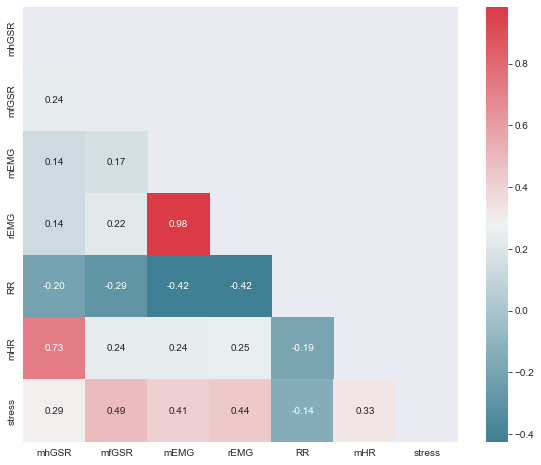

In [19]:
sns.set_style("dark")

plt.figure(figsize = (10,8))
colnm = df.columns.tolist()

mcorr = df[colnm].corr()

mask = np.zeros_like(mcorr, dtype=np.bool)

mask[np.triu_indices_from(mask)] = True
   
cmap = sns.diverging_palette(220, 10, as_cmap=True)

g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')
print("\nFigure 8: Pairwise Correlation Plot")

# ---------------------------------------------------------------------------------------------------------------

# Using Random Forest for Feature Imporance

In [20]:
# Separate inputs with the target 

X = df.drop(columns=['stress'])

y = df['stress']
    
 

    

In [21]:
# Split between training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [22]:
X_train.shape, y_train.shape

((45, 6), (45,))

In [23]:
X_train

,mhGSR,mfGSR,mEMG,rEMG,RR,mHR
46,9.14,6.26,0.26,0.28,50.09,69.94
10,18.26,9.95,4.68,6.18,31.08,109.95
63,19.91,7.56,0.81,0.97,37.41,103.71
19,7.73,14.23,0.17,0.54,33.04,75.79
52,14.85,3.98,0.29,0.34,45.35,90.57
24,6.59,7.27,0.36,0.43,41.75,66.97
8,20.31,12.47,0.75,1.31,39.00,105.44
17,6.59,12.26,0.14,0.33,34.06,71.73
47,4.00,3.26,0.26,0.27,50.07,57.68
62,14.41,3.09,0.20,0.21,37.64,91.58


In [24]:
# Transform the data
"""
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

"""

'\nscaler = StandardScaler()\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.fit_transform(X_test)\n\n'

In [25]:
# Fit the model
rf_model = RandomForestClassifier(random_state = 2020)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=2020)

In [26]:
# Make prediction
y_pred = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test,y_pred)
print('Accuracy = ', acc_rf)

Accuracy =  0.6521739130434783


In [27]:
# Importance feature
imp_rf = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_),columns = ["feature", "importance"])
imp_rf.set_index("feature", inplace=True)
imp_rf.sort_values(by = "importance", ascending = False, inplace = True)
imp_rf.head()

,importance
feature,
mhGSR,0.225240
mfGSR,0.222301
mHR,0.185443
rEMG,0.142478
mEMG,0.129785


# Regression Analysis

## Estimating the Coefficient of a Regression Model via Scikit-learn

In [62]:
from sklearn.linear_model import LinearRegression

In [52]:
# Visualizing the important characteristics of a dataset
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

In [69]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)



LinearRegression()

In [70]:
print(mlr.intercept_, mlr.coef_)

-3.9622619067544855 [-0.03126246  0.1888368   0.16266813  0.30615703  0.06607279  0.04336621]


# Clustering the input features using K-means

In [28]:
# Dataframe for all the inputs
df_inputs = df.drop(columns=['stress'])


In [30]:
# Let's scale the data first
scaler = StandardScaler()
df_inputs_scaled = scaler.fit_transform(df_inputs)

In [31]:
df_inputs_scaled

array([[-1.17391201e+00, -1.24052141e+00, -6.31493404e-01,
        -6.55355543e-01, -2.56048018e+00, -7.59597024e-01],
       [-1.20381318e-02,  2.23290971e-01,  1.44535546e+00,
         1.30690445e+00, -1.83636765e+00,  2.28427151e-01],
       [-4.90871003e-01, -3.15836358e-01, -1.99316761e-01,
        -3.04653757e-01, -8.97906816e-01, -4.91211600e+00],
       [-3.65881540e-01, -9.36505494e-02,  2.15364496e+00,
         2.32560964e+00, -1.57255436e+00, -1.13507333e-01],
       [-5.75370921e-01, -2.96231728e-01,  1.33731130e+00,
         1.20670394e+00, -1.50522700e+00, -1.76259354e-01],
       [-6.61631255e-01, -3.51778180e-01,  1.81750757e+00,
         1.27350428e+00, -6.39589631e-01,  1.14448990e-01],
       [-1.08061002e+00, -1.22418422e+00, -6.79513031e-01,
        -6.88755714e-01, -5.80506445e-01, -7.67921271e-01],
       [ 1.72725186e+00,  7.00336971e-01, -1.27287320e-01,
        -2.79603630e-01, -5.36537563e-01,  6.60647708e-01],
       [ 1.91033501e+00,  1.96156818e+00,  1.677

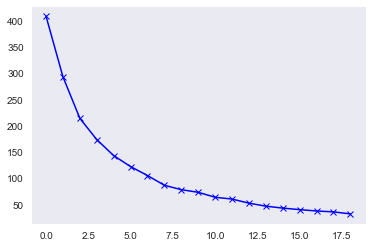

In [33]:
# Finding the optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

scores_1 = []
range_values = range(1, 20)

for i in range_values :
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_inputs_scaled)
    scores_1.append(kmeans.inertia_)
plt.plot(scores_1, 'bx-')

In [38]:
# Apply K-means method
kmeans = KMeans(7)
kmeans.fit(df_inputs_scaled)
labels = kmeans.labels_

In [39]:
kmeans.cluster_centers_.shape

(7, 6)

In [40]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_inputs.columns])
cluster_centers

,mhGSR,mfGSR,mEMG,rEMG,RR,mHR
0,1.703086,0.253292,-0.005056,-0.001016,-0.701671,1.145084
1,-0.778201,-0.561320,-0.533888,-0.543175,0.883251,-0.596091
2,-0.424295,1.076686,-0.534363,-0.500500,-0.822460,-0.106988
3,-0.453022,-0.022856,1.293293,1.270025,-0.605697,-0.111159
4,0.992499,-0.503714,-0.548960,-0.565593,0.825811,0.746051
5,0.909539,1.450214,3.642253,3.799392,-0.994776,1.284326
6,-0.490871,-0.315836,-0.199317,-0.304654,-0.897907,-4.912116


In [41]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df_inputs.columns])
cluster_centers

,mhGSR,mfGSR,mEMG,rEMG,RR,mHR
0,19.132727,7.241818,0.731818,1.003636,34.478182,94.595455
1,5.037826,4.748696,0.291304,0.354348,46.013043,67.403478
2,7.048182,9.761818,0.290909,0.405455,33.599091,75.041818
3,6.885000,6.396667,1.813333,2.525833,35.176667,74.976667
4,15.096250,4.925000,0.278750,0.327500,45.595000,88.363750
5,14.625000,10.905000,3.770000,5.555000,32.345000,96.770000
6,6.670000,5.500000,0.570000,0.640000,33.050000,0.000000


In [42]:
labels.shape # Labels associated to each data point

(68,)

In [44]:
y_kmeans = kmeans.fit_predict(df_inputs_scaled)
y_kmeans

array([2, 1, 5, 1, 1, 1, 2, 4, 4, 4, 3, 4, 4, 4, 2, 0, 0, 0, 0, 0, 0, 6,
       6, 6, 2, 2, 6, 6, 6, 1, 2, 1, 1, 1, 2, 1, 2, 3, 2, 0, 2, 6, 6, 6,
       6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 6, 1, 1, 1, 2, 2, 6, 4, 4, 4, 4,
       4, 4])

In [45]:
# concatenate the clusters labels to our original dataframe
df_inputs_cluster = pd.concat([df_inputs, pd.DataFrame({'cluster':labels})], axis = 1)
df_inputs_cluster.head()

,mhGSR,mfGSR,mEMG,rEMG,RR,mHR,cluster
0,2.79,2.67,0.21,0.22,20.95,64.85,2
1,9.39,7.15,1.94,2.57,26.22,80.28,3
2,6.67,5.50,0.57,0.64,33.05,0.00,6
3,7.38,6.18,2.53,3.79,28.14,74.94,3
4,6.19,5.56,1.85,2.45,28.63,73.96,3


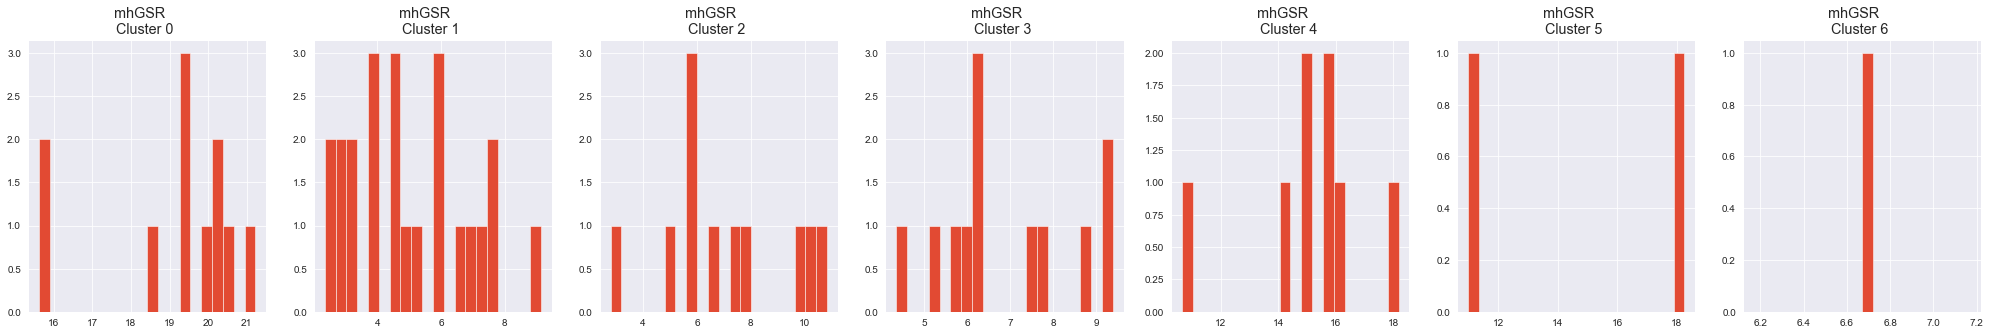

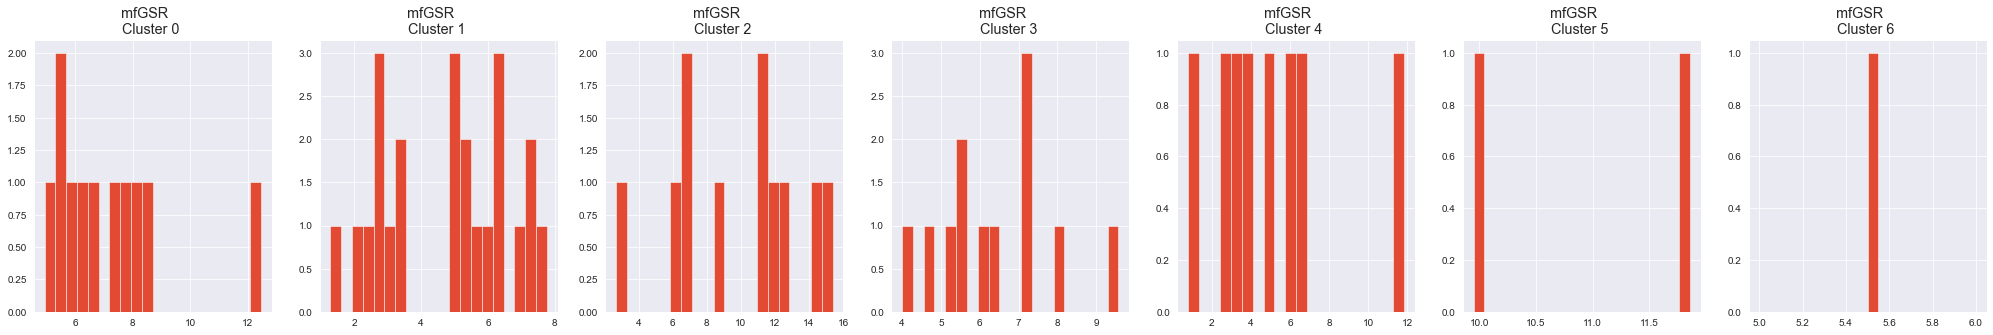

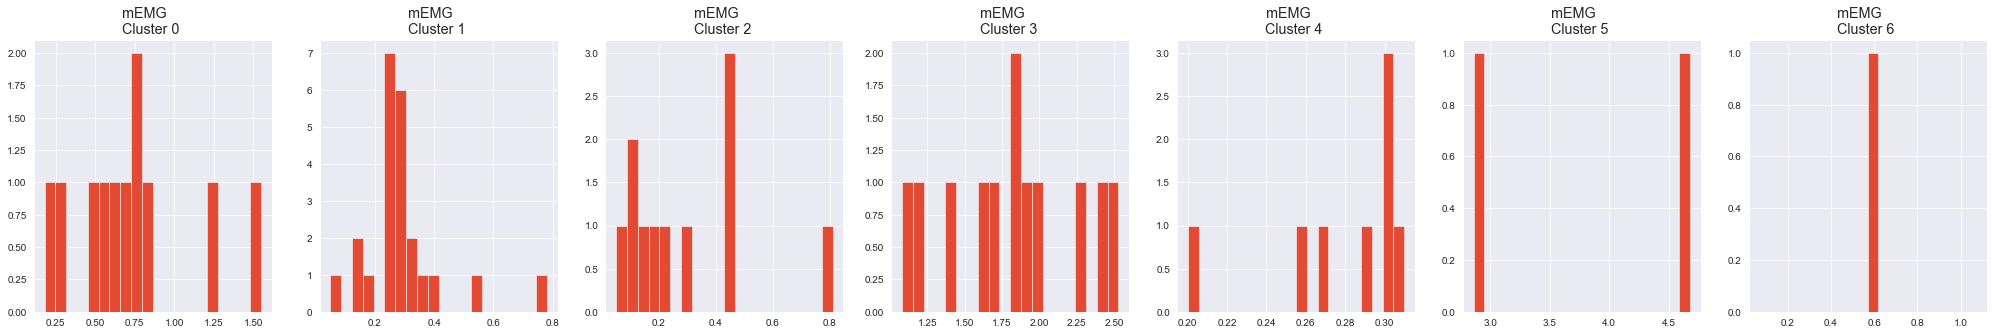

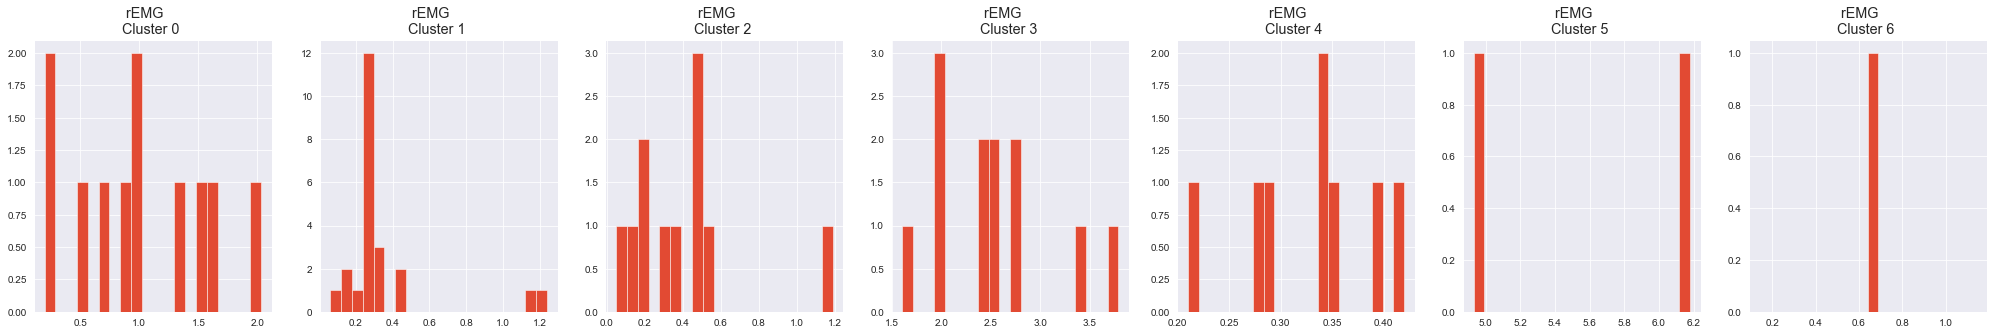

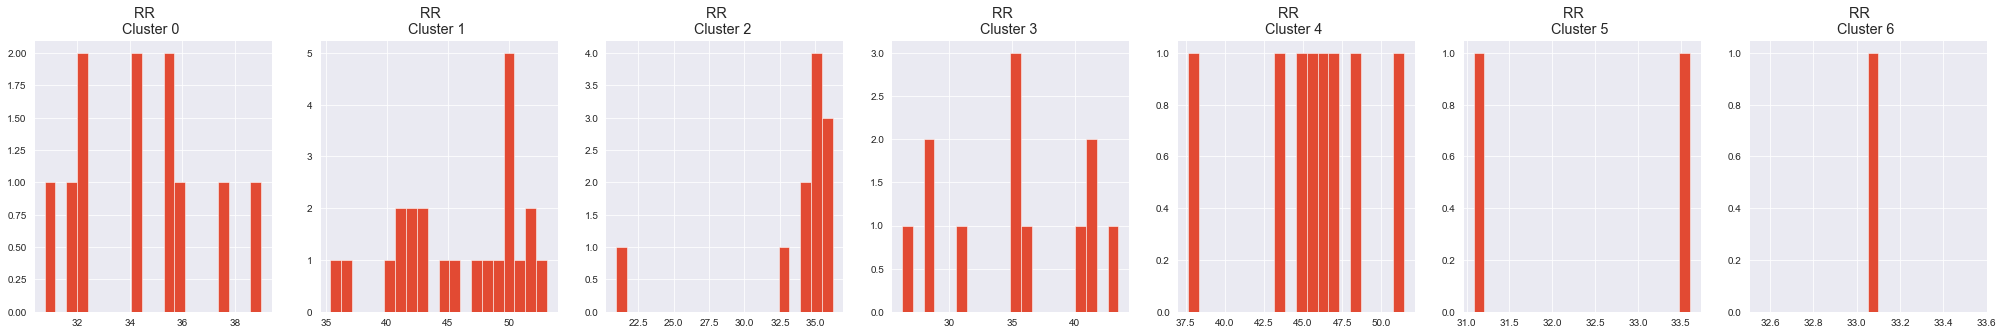

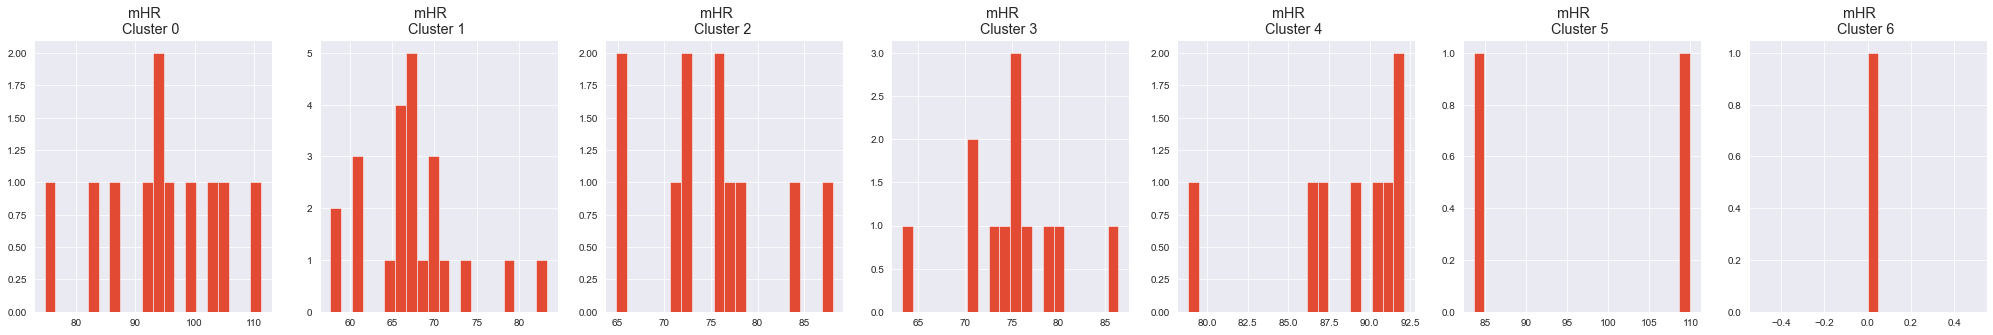

In [46]:
for i in df_inputs.columns:
  plt.figure(figsize = (35, 5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = df_inputs_cluster[df_inputs_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

# Applying Principal Component Analysis to Visualize the Clusters

In [47]:
# Obtain the principal components 
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_inputs_scaled)
principal_comp

array([[-0.69827799,  1.13836033],
       [ 2.25281477,  1.1642576 ],
       [-2.01024537,  2.87633167],
       [ 2.69273607,  2.26074761],
       [ 1.53055233,  1.68403664],
       [ 1.53761974,  1.69945351],
       [-1.47096796,  0.80292979],
       [ 1.02415223, -1.60158067],
       [ 2.05988879, -2.34954949],
       [ 1.6643345 , -0.8668038 ],
       [ 6.69463818,  1.46284785],
       [ 0.5667516 , -1.02770222],
       [ 2.50734768, -0.97766446],
       [ 0.54020755, -0.84487044],
       [-1.37261983,  0.07750077],
       [-0.1326191 , -0.640456  ],
       [ 0.69994329, -1.19285259],
       [-0.10233751, -0.26794502],
       [-0.31494041, -0.2784823 ],
       [ 0.4087203 , -0.53837723],
       [-0.68642642,  0.05438107],
       [-2.27109466,  0.80834129],
       [-1.28964565, -0.18870721],
       [-1.46332965,  0.09467192],
       [-0.91581236,  0.18381461],
       [-1.26360548,  0.40997334],
       [-1.23470709, -0.14831397],
       [-2.41811573,  0.70592216],
       [-1.94569574,

In [48]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-0.698278,1.138360
1,2.252815,1.164258
2,-2.010245,2.876332
3,2.692736,2.260748
4,1.530552,1.684037


In [49]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-0.698278,1.138360,2
1,2.252815,1.164258,3
2,-2.010245,2.876332,6
3,2.692736,2.260748,3
4,1.530552,1.684037,3


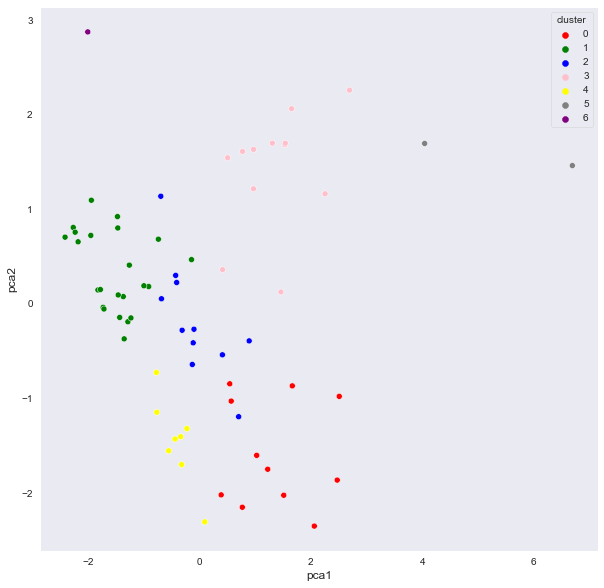

In [50]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple'])
plt.show()

# Artificial Neural Network model for stress prediction

In [2]:
# Import dependencies 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [52]:
# define baseline model
"""
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

"""

'\ndef baseline_model():\n    # create model\n    model = Sequential()\n    model.add(Dense(8, input_dim=4, activation=\'relu\'))\n    model.add(Dense(3, activation=\'softmax\'))\n    # Compile model\n    model.compile(loss=\'categorical_crossentropy\', optimizer=\'adam\', metrics=[\'accuracy\'])\n    return model\n \nestimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)\nkfold = KFold(n_splits=10, shuffle=True)\nresults = cross_val_score(estimator, X, dummy_y, cv=kfold)\nprint("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))\n\n'